# スコープ
名前空間を分ける仕切り

## 1. ざっくり全体像
簡単にはPythonのスコープは3つに分けることが可能。
- built-in スコープ
- global スコープ
- local スコープ

正確にはこれ加えてに nested スコープがある。

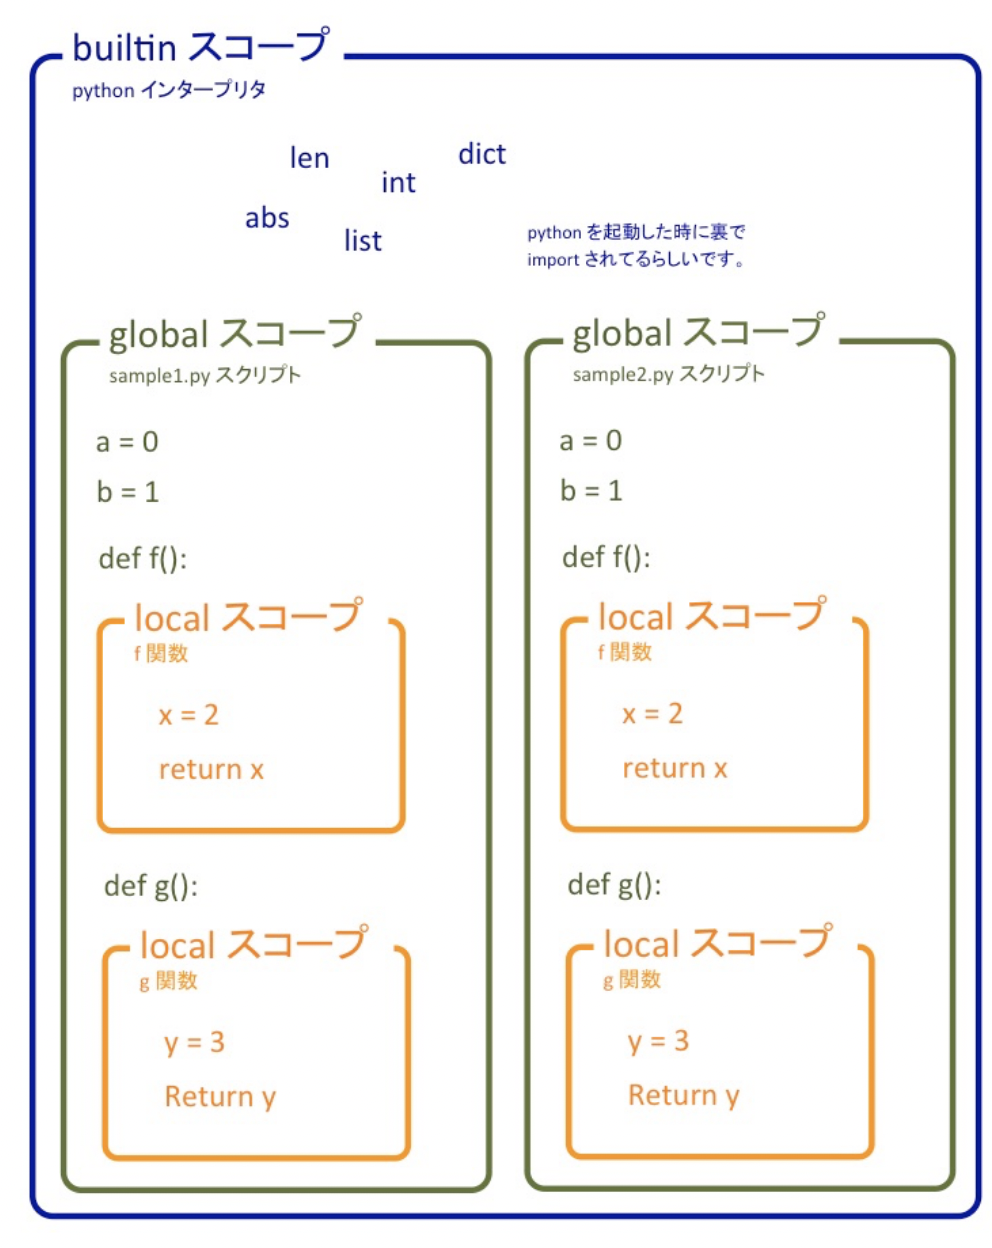

### 1.1 スコープの考え方
その範囲の中で定義された変数は、「外から中」は見ることも触ることもできないけど、「中から外」は触ることはできないが、見ることならできる。

|   |  参照  | 変更 |
| ---- | ---- | ---- |
|  外から中  |  できない  | できない |
|  中から外  |  できる  | できない |


### 1.2 スコープの順番
狭いスコープの方が強い。参照の順番は内側から外側に向けて名前を探していく。（名前解決）
1. local スコープ
2. global スコープ
3. built-in スコープ

例：globalスコープから参照しようとすれば、global -> built-in と探していく

## 2. built-in スコープ
buit-in スコープは全体のスコープ。min, max, sumといった組み込み関数や、int, list, strといった組み込み型はこのbuilt-in スコープに組み込まれている。 

### 2.1 built-in スコープはどこにあるのか？
pythonコマンドを実行した時、起動したPythonがbuilt-inスコープに、「組み込み関数」や「組み込み型」の変数にオブジェクトを裏で設定してくれている。

### 2.2. \_\_builtins\__
built-in スコープに入っているオブジェクトは、\_\_builtins\__の属性から参照することが可能。  
また、新しい属性を追加することでbuilt-in スコープに、新しい名前を追加することが可能。

In [8]:
print(__builtins__.min is min)
__builtins__.name = "new built-in scope valiable"
print(name)

import builtins
assert builtins is __builtins__

True
new built-in scope valiable


> このモジュールはPythonの全ての「組み込み」識別子に直接アクセスするためのもの。例えばbuiltins.openは組み関数open()の完全な名前。ドキュメントは組み関数と組み込み定数を参照してください。

[29.3. builtins — 組み込みオブジェクト](https://docs.python.jp/3/library/builtins.html)

### 3.2. globals 関数
globals関数を用いて global スコープを取得することが可能。  
ここで驚きなのは globals 関数で取得したオブジェクトは、辞書型 dictだということ。つまり、スコープも内部的には辞書で実行されているということ。

In [10]:
a = 0

# 辞書を更新
globals()['a'] += 1

# 変数も更新される
print(a)

# スコープは辞書型 dict
type(globals())

1


dict

> 現在のグローバルシンボルテーブルを表す辞書を返す。これは常に現在のモジュール（関数やメソッドの中では、それを呼び出したモジュールではなく、それを定義しているモジュール）の辞書。  

[globals() Python 標準ライブラリ](https://docs.python.org/ja/3/library/functions.html#globals)

### 3.3. 名前空間は目に見えるスコープ
実際にPythonの属性、されには変数までもが（即ちスコープそのものが）、辞書で実装されている。

In [13]:
# スコープも属性も辞書でしかない

# global スコープ
#   var = 0
globals().update({'var': 0})
print(var)

# 属性
# obj.attr = 1

class Cls:
    pass

obj = Cls()
obj.__dict__.update({'attr': 1})
print(obj.attr)


0
1


> スコープとは、ある名前空間が直接アクセスできるようなPythonプログラムのテキスト上の領域。”直接アクセス可能"とは、修飾なしに（spam.eggではなく単にeggのように）名前を参照した際に、その名前空間から名前を見つけようと試みることを意味する。

> 名前空間とは、名前からオブジェクトへの対応付けです。ほとんどの名前空間は、現状ではPythonの辞書として実装されている

[9.2. Python のスコープと名前空間 - Python チュートリアル](https://docs.python.jp/3/tutorial/classes.html#python-scopes-and-namespaces)

## 4. local スコープ

### 4.2. クラスのローカルスコープ
関数定義文defの中にローカルスコープがあるように、クラス定義文classの中にもローカルスコープがある。そして、このclass定義文の中で定義された変数は、クラス変数と呼ばれる。
```
class Person:
    species = "Homo sapiens"
```

### 4.3. ネストするローカルスコープ
ローカルスコープはネストすることが可能。

In [17]:
class Person:
    # Personクラスのローカルスコープ
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender
        # __init__ 関数のローカルスコープ

person = Person("superman", 20, 'male')
print(person.name)
print(person.age)
print(person.gender)

superman
20
male


## 5. スコープは狭い方が良い

| | 書きやすさ | 読みやすさ |
| --- | --- | --- |
| global スコープ | ○ | × |
| local スコープ | × | ○ |

一般にスコープは小さい方が良いとされている（global スコープは使わずにlocalスコープを使った方が良い）。

### 5.1. 書きやすさ
local スコープは都度引数を渡さないといけないので、global スコープに比べば、書くのは煩雑になる。

### 5.2. 読みやすさ
個々の関数に区切って見た時に、localスコープは何が操作対象になっているか明確。例えば、引数とそこで関数の中で新たに作った変数だけを意識しておけばよい。例えば引数とそこで関数の中で新たに作った変数だけを意識しておけばよい。このような変数を自由変数という。  
しかし、global変数が存在すると、その存在を覚えておかないといけない。あれ？この変数はどこで定義されているんだっけ？というところから始めないといけない。  
コードを読むこともさることながら、コードの中から必要なことを探し出すことがとても面倒になる。どこから参照、変更されているか分からない点かがわからない。globalスコープを使うというのは、コードをglobalに把握しておかなければならなくなる。その分だけ読む側の負担が大きくなる。  

ただ、これが100%当てはまるわけでなく[例外](https://www.furomuda.com/entry/20081026/p1https://www.furomuda.com/entry/20081026/p1)も存在する。